In [5]:
# Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Imort and clean data
df = pd.read_csv("students_performance.csv")
df = df.dropna()
df = df.iloc[:, [1, 4, 5, 6, 8, 9, 11, 14, 16, 18, 30]]

df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,stress_level,exam_score
0,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,4.00,5.8,100
1,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,4.00,5.8,99
2,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,3.79,8.0,98
3,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,4.00,4.6,100
4,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4.00,5.7,98


In [ ]:
# split the data

# Study_hours_per_day and social_media_hours
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]  # Variables indexed 1:9
y = df.iloc[:, [-1]]  # Exam_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

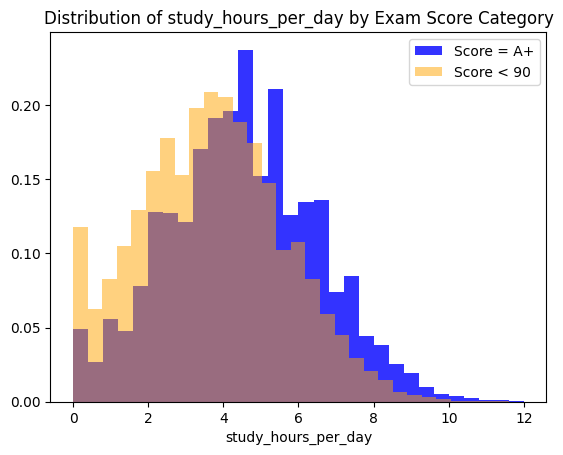

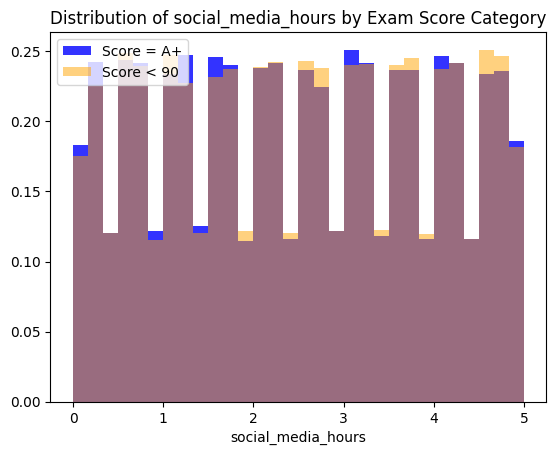

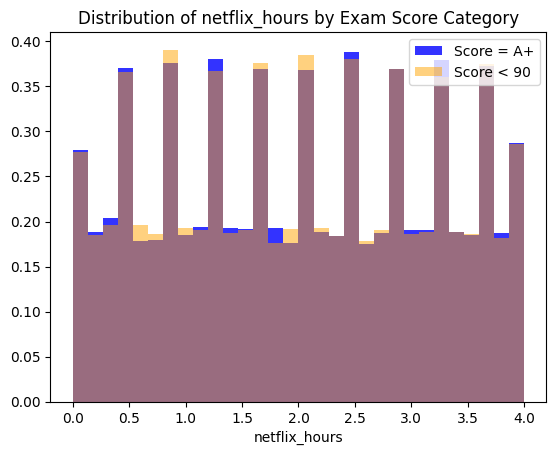

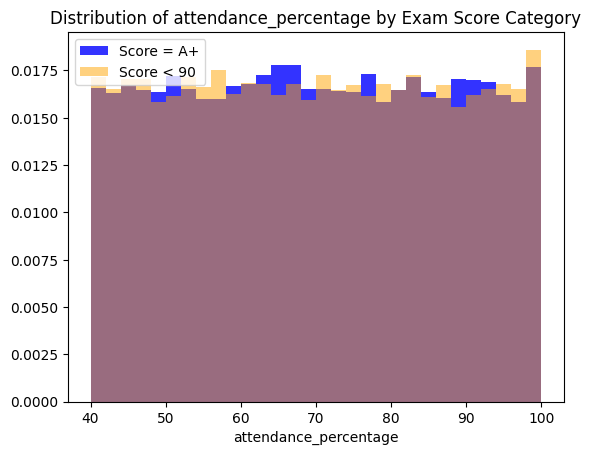

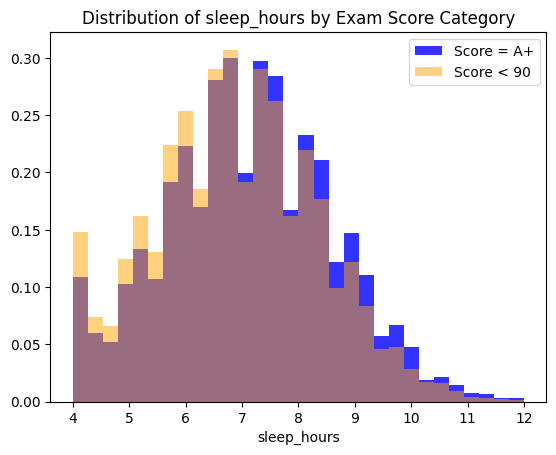

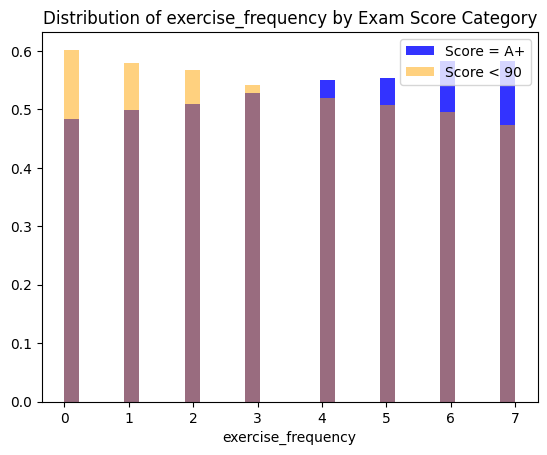

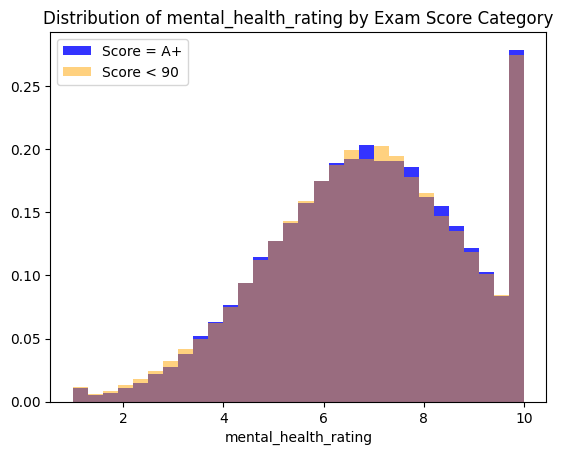

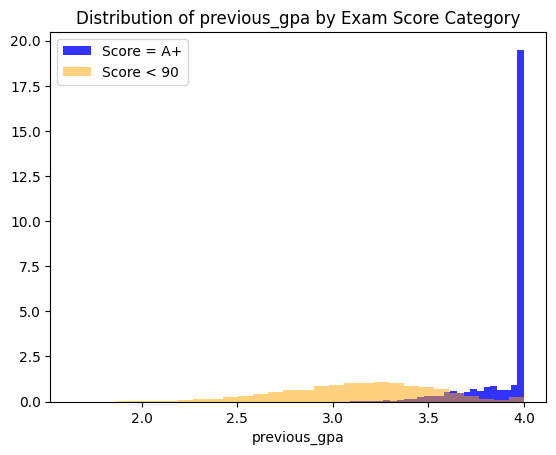

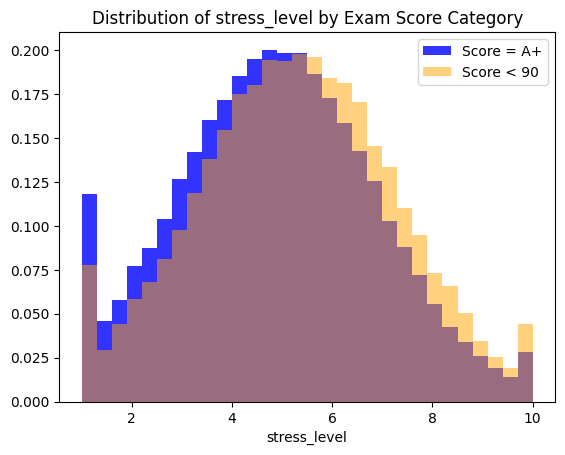

In [ ]:
# AAnalyzing the X variebles to see their relationship/difference with the y variable
for label in X.columns:
    plt.hist(df[df["exam_score"] >= 90][label], bins=30,
             density=True, alpha=0.8, label='Score = A+', color='blue')
    plt.hist(df[df["exam_score"] < 90][label], bins=30,
             density=True, alpha=0.5, label='Score < 90', color='orange')
    plt.xlabel(label)
    plt.ylabel("")
    plt.title(f"Distribution of {label} by Exam Score Category")
    plt.legend()
    plt.show()

With the analyzed data, 
- the students that spent at least 4:30mins a day scored A+
- a good number of students that slept at least 7 hours had A+
- a good number students that exercised frequently (atleast 4 times a week) scored A+
- students with previouly good gpa scored A+
- students with less stress level scored good grades


In [9]:
# Train

# Creating the instance of the model RF
rf = RandomForestRegressor()

rf_model = rf.fit(X_train, y_train)

c:\Users\kouhi\envs\projects\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [11]:
# Test the model
y_predict = rf_model.predict(X_test)

In [12]:
# rmse and r2

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

print(rmse)
print(r2)

4.255598212942571
0.8654632139368587
